<div align=center style="font-weight:900;">Examen Introducción a la Programación para Ciencia de Datos</div>
<div align=center>(Extraordinario 2024/2025)</div>
<br>
<div align=justify>Nota: No se puede utilizar ciclos explícitos ni funciones no vectorizadas en ningún ejercicio. De
hacerlo se anulará el ejercicio correspondiente. El examen se resuelve en papel. Adjunto a este
examen dispone de una cheat sheet con las funciones más utilizadas en R.</div>

In [1]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


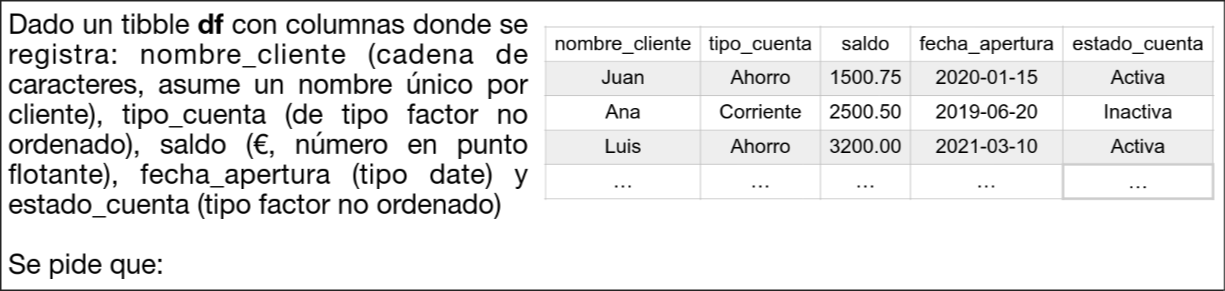

In [2]:

# Fijar semilla para reproducibilidad
set.seed(42)

# Generar un vector con 100 nombres ficticios
nombres <- c("Juan", "Ana", "Luis", "Marta", "Pedro", "Carlos", "Maria", "Lucia", "Javier", "Raul", "Elena", 
             "Sofia", "Diego", "Paula", "Victor", "Sara", "Felipe", "Alba", "Ricardo", "Toni", "Marcela", 
             "Raquel", "Jose", "Patricia", "Andres", "Lorena", "Francisco", "Monica", "Sergio", "Isabel", 
             "Xavier", "Bea", "Rocio", "Claudia", "Miquel", "Eva", "Marta", "Daniel", "Adriana", "Adrian", 
             "Oscar", "Antonio")

# Crear el tibble con 100 registros
df <- tibble(
  nombre_cliente = sample(nombres, size = 100, replace = TRUE),  # Selección aleatoria de nombres
  tipo_cuenta = factor(sample(c("Ahorro", "Corriente"), size = 100, replace = TRUE), levels = c("Ahorro", "Corriente")),  # Aleatorio entre Ahorro y Corriente
  saldo = round(runif(100, 1000, 5000), 2),  # Generar saldos aleatorios entre 1000 y 5000
  fecha_apertura = as.Date('2015-01-01') + sample(0:3000, size = 100, replace = TRUE),  # Fechas aleatorias dentro de un rango de tiempo
  estado_cuenta = factor(sample(c("Activa", "Inactiva"), size = 100, replace = TRUE), levels = c("Activa", "Inactiva"))  # Aleatorio entre Activa e Inactiva
)

# Ver los primeros datos
head(df)

nombre_cliente,tipo_cuenta,saldo,fecha_apertura,estado_cuenta
<chr>,<fct>,<dbl>,<date>,<fct>
Marta,Ahorro,3198.48,2022-04-07,Activa
Juan,Ahorro,2927.93,2022-05-16,Activa
Andres,Corriente,1637.88,2018-01-14,Inactiva
Raul,Corriente,1598.32,2021-04-16,Inactiva
Eva,Ahorro,2997.09,2015-06-18,Inactiva
Alba,Corriente,4762.26,2017-06-25,Inactiva


### **Ejercicio1**
Usando funciones del paquete tidyverse:


1. Indica cuantos clientes diferentes tienen cuentas activas con un saldo superior o igual a
3000€.



In [3]:
df %>% 
  group_by(nombre_cliente) %>%
  filter(saldo>=3000, estado_cuenta=="Activa") %>%
  pull(nombre_cliente) %>% n_distinct()

[1] 17

2. Encuentra lo 3 clientes más ricos del tibble (ten en cuenta que una misma persona podría
tener más de una cuenta) y ordénalos por su saldo total de mayor a menor

In [4]:
df %>% arrange(desc(saldo))  %>% head()


nombre_cliente,tipo_cuenta,saldo,fecha_apertura,estado_cuenta
<chr>,<fct>,<dbl>,<date>,<fct>
Pedro,Corriente,4963.18,2019-07-05,Activa
Marta,Ahorro,4930.64,2019-12-24,Activa
Marta,Ahorro,4917.34,2023-03-02,Inactiva
Xavier,Ahorro,4782.96,2016-09-16,Inactiva
Alba,Corriente,4762.26,2017-06-25,Inactiva
Adriana,Corriente,4740.56,2016-09-11,Inactiva


In [5]:
df %>%
  group_by(nombre_cliente) %>%
  summarise(SaldoMax = max(saldo)) %>%
  arrange(desc(SaldoMax)) %>% head(3)

nombre_cliente,SaldoMax
<chr>,<dbl>
Pedro,4963.18
Marta,4930.64
Xavier,4782.96


In [11]:
df %>%
  arrange(nombre_cliente) %>%
  group_by(nombre_cliente) %>%
  filter(saldo == max(saldo)) %>%
  arrange(desc(saldo)) %>%
  head(3)

nombre_cliente,tipo_cuenta,saldo,fecha_apertura,estado_cuenta,daysSinceApt
<chr>,<fct>,<dbl>,<date>,<fct>,<drtn>
Pedro,Corriente,4963.18,2019-07-05,Activa,2316 days
Marta,Ahorro,4930.64,2019-12-24,Activa,2144 days
Xavier,Ahorro,4782.96,2016-09-16,Inactiva,3338 days


In [42]:
df %>%
  group_by(nombre_cliente) %>%
  top_n(1, saldo) %>%
  arrange(desc(saldo)) %>%
  head(3)

nombre_cliente,tipo_cuenta,saldo,fecha_apertura,estado_cuenta,daysSinceApt
<chr>,<fct>,<dbl>,<date>,<fct>,<drtn>
Pedro,Corriente,4963.18,2019-07-05,Activa,2316 days
Marta,Ahorro,4930.64,2019-12-24,Activa,2144 days
Xavier,Ahorro,4782.96,2016-09-16,Inactiva,3338 days


### **Ejercicio2**
Utilizando el paquete de ggplot2, crea un
gráfico de barras (en horizontal, como se muestra
en el ejemplo de debajo) que muestre el saldo
total por tipo de cuenta, diferenciando los colores
según el tipo de cuenta (activa o inactiva)
<br>
<br>
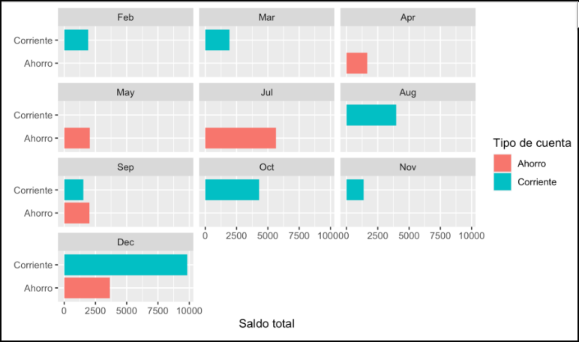

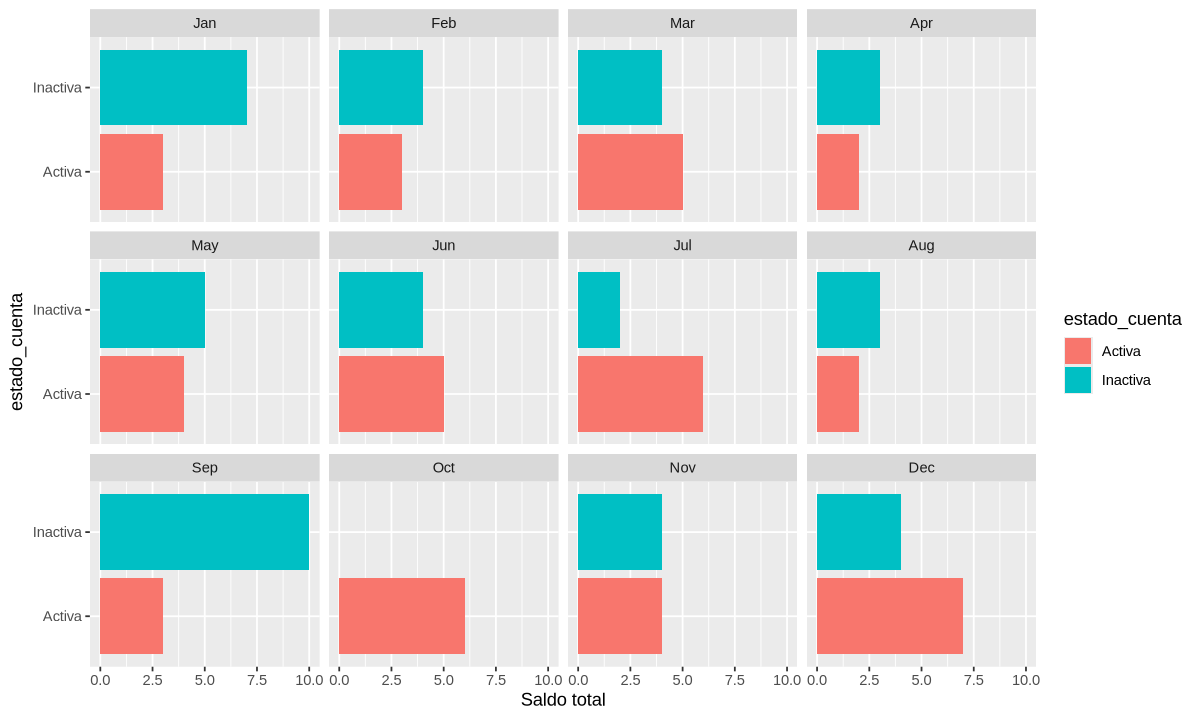

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(df, aes(y = estado_cuenta, fill = estado_cuenta)) +
  geom_bar() +
  facet_wrap(~month(fecha_apertura, label=TRUE)) +
  labs(x="Saldo total")

### **Ejercicio3**
Agregue al tibble df una nueva columna con la cantidad de días que han pasado
desde la fecha de apertura. 

In [8]:
(df <- df %>%
  mutate(daysSinceApt = (today() - fecha_apertura))) %>%
  head()

nombre_cliente,tipo_cuenta,saldo,fecha_apertura,estado_cuenta,daysSinceApt
<chr>,<fct>,<dbl>,<date>,<fct>,<drtn>
Marta,Ahorro,3198.48,2022-04-07,Activa,1309 days
Juan,Ahorro,2927.93,2022-05-16,Activa,1270 days
Andres,Corriente,1637.88,2018-01-14,Inactiva,2853 days
Raul,Corriente,1598.32,2021-04-16,Inactiva,1665 days
Eva,Ahorro,2997.09,2015-06-18,Inactiva,3794 days
Alba,Corriente,4762.26,2017-06-25,Inactiva,3056 days


Luego cree una lista en donde cada elemento sea un cliente y,
para cada cliente, se almacene la cuenta más antigua (independientemente del tipo y del
estado).
<br>
<br>
<br>
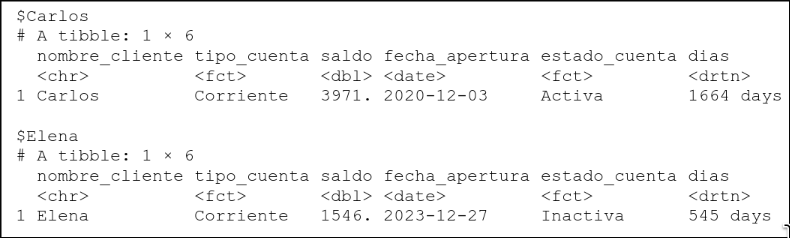

In [9]:
unique_names <- unique(df$nombre_cliente)

x <- lapply(unique_names, function(name) {
  df[df$nombre_cliente == name,] %>%
    arrange(fecha_apertura) %>%
    head(1)
})
names(x) <- unique_names
print(x)

$Marta
# A tibble: 1 × 6
  nombre_cliente tipo_cuenta saldo fecha_apertura estado_cuenta daysSinceApt
  <chr>          <fct>       <dbl> <date>         <fct>         <drtn>      
1 Marta          Corriente   2916. 2019-03-26     Inactiva      2417 days   

$Juan
# A tibble: 1 × 6
  nombre_cliente tipo_cuenta saldo fecha_apertura estado_cuenta daysSinceApt
  <chr>          <fct>       <dbl> <date>         <fct>         <drtn>      
1 Juan           Ahorro      2637. 2015-04-04     Activa        3869 days   

$Andres
# A tibble: 1 × 6
  nombre_cliente tipo_cuenta saldo fecha_apertura estado_cuenta daysSinceApt
  <chr>          <fct>       <dbl> <date>         <fct>         <drtn>      
1 Andres         Ahorro      3123. 2017-07-07     Activa        3044 days   

$Raul
# A tibble: 1 × 6
  nombre_cliente tipo_cuenta saldo fecha_apertura estado_cuenta daysSinceApt
  <chr>          <fct>       <dbl> <date>         <fct>         <drtn>      
1 Raul           Ahorro      4028. 2018-06-02     A

### **Ejercicio4**
Utilizando funciones del paquete de stringr, agregar al
tibble una nueva columna de tipo factor ordenado llamada
“categoria_nombre” que clasifique los nombres de cada cliente
en tres categorías nuevas: "Corto" si el nombre tiene menos de
5 caracteres, "Medio" si tiene entre 5 y 7 caracteres y "Largo" si
tiene más de 7 caracteres. Mostrar solo las columnas
nombre_cliente y categoria_cliente.
<br>
<br>
<br>
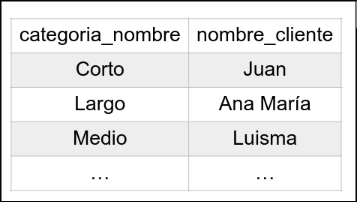

In [10]:
df %>%
  mutate(categoria_nombre = cut(
    x = str_length(nombre_cliente),
    breaks = c(-1,5,7,+Inf),
    labels = c("Corto", "Medio", "Largo")
  )) %>%
  select(categoria_nombre, nombre_cliente)

categoria_nombre,nombre_cliente
<fct>,<chr>
Corto,Marta
Corto,Juan
Medio,Andres
Corto,Raul
Corto,Eva
Corto,Alba
Largo,Patricia
Corto,Maria
Corto,Eva
